<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_06_interpolacion.pynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Actividad 6
### Métodos computacionales para físicos  y astrónomos
### Universidad de Antioquia
### Prof: Hernan D. Salinas Jiménez
Ref: https://github.com/restrepo/ComputationalMethods

__Activity__:  Movement with uniform acceleration
1. Define a polynomial for the movement with uniform acceleration:
\begin{align}
x(t)=x_0+v_0 (t-t_0)+\tfrac{1}{2} a (t-t_0)^2 \,,
\end{align}
2. Use the previous formula expressed as polynomial of degree 2, to solve the following problem with `np.poly1d`: 
    * A car departs from rest with a constant acceleration of $6\text{m}\cdot\text{s}^{-2}$ and travels through a flat and straight road. 10 seconds later a second pass for the same starting point and in the same direction with an initial speed of $10\text{m}\cdot\text{s}^{-1}$ and a constant acelleration of $10\text{m}\cdot\text{s}^{-2}$. Find the time and distance at which the two cars meet. *
    
_Hint_. 
\begin{align}
x(t)=x_0-v_0t_0+\frac{1}{2}at_0^2 +(v_0-at_0)t+\tfrac{1}{2} a t^2 
\end{align}



__Activity__: For  the function $f(x) = \tan (x)$ between $-\frac{\pi}{4}$ and $\frac{\pi}{4}$ using $N=10$ points (9 intervals). Plot both, the interpolation and the original function.

Explore the behaviour of the Linear Interpolation algorithm when varying the number of data used.


__Activity__: Apply lagrange interpolations with the following points, work with pandas data frame


x =  np.array([1, 1.3, 1.6, 1.9, 2.2])

fx =  np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])



__Activity__: Consideremos la imagen del planetario de medellin u otra imagen sobre la cual podamos realizar un ajuste, descargue la imagen de google.


![img](https://github.com/hernansalinas/autogrades/blob/main/Actividades_clase/imagenes/planetario.png?raw=true)
1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`) 

2. Definir una lista de puntos, $x_i$, equiespaciados en $[a,b]$,  definidos adecuadamente para que los puntos esten (aproximadamente) situados en la superficie del domo,  del edificio que representa la imagen.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`), 



5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

# 1. Carros moviendose en MRUA

__Activity__:  Movement with uniform acceleration
1. Define a polynomial for the movement with uniform acceleration:
\begin{align}
x(t)=x_0+v_0 (t-t_0)+\tfrac{1}{2} a (t-t_0)^2 \,,
\end{align}
2. Use the previous formula expressed as polynomial of degree 2, to solve the following problem with `np.poly1d`: 
    * A car departs from rest with a constant acceleration of $6\text{m}\cdot\text{s}^{-2}$ and travels through a flat and straight road. 10 seconds later a second pass for the same starting point and in the same direction with an initial speed of $10\text{m}\cdot\text{s}^{-1}$ and a constant acelleration of $10\text{m}\cdot\text{s}^{-2}$. Find the time and distance at which the two cars meet. *
    
_Hint_. 
\begin{align}
x(t)=x_0-v_0t_0+\frac{1}{2}at_0^2 +(v_0-at_0)t+\tfrac{1}{2} a t^2 
\end{align}

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.backend_bases import MouseButton
import numpy as np
from scipy.interpolate import lagrange
import pandas as pd


In [ ]:

def x(t_o,x_o,v_o,a,t): # la funcion retorna la posicion de una particula con aceleracion uniforme en tiempo determinado.
  t = np.arange(1,t+1)
  x = x_o + v_o*(t-t_o)+1/2*a*(t-t_o)**2
  return x_o + v_o*(t-t_o)+1/2*a*(t-t_o)**2

t_o=0 # Parametros
x_o=0
v_o=0
a= 2
t=5
#t= np.arrange(0,3600)
param= (t_o,x_o,v_o,a,t) # escritos como tuplas


In [ ]:
x(*param)

array([ 1.,  4.,  9., 16., 25.])

In [ ]:
def x(x_o,v_o,a):# La funcion acepta parametros como la posicion inicia, la velocidad inicial y la aceleracion
  posi = np.poly1d([1/2*a,v_o,x_o],variable='t') # Definimos el  polinomio de cualquier partifuca en MRUA como np.poly1d
  return posi


In [ ]:
carro1= x(0,0,6)# Ecuacion para el carro 1
print(carro1)

   2
3 t


In [ ]:
carro2= x(0,10,10) # Ecuacion para el carro 2
print(carro2)

   2
5 t + 10 t


(4.0, 6.0)

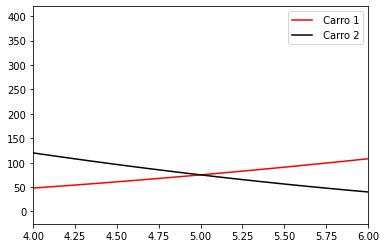

In [ ]:
t= np.linspace(0,10, 100) #definimos como un linspace un tiempo de 10 segundo
t_0 = 10 # Tiempo de diferencia entre el carro 1 y el carro 2
plt.plot(t,carro1(t),'r', label=" Carro 1") # mostramos la graficae en rojo del primer carro, y el t_0= 0
plt.plot(t,carro2(t-t_0),'k', label=" Carro 2") # mostramos la grafica en negro del segundo carro estableciendo el tiempo como t_0=10
plt.legend()

plt.xlim((4, 6))# hacemos Zoom y se cortan alrededor de 5 segundos


In [ ]:
carro1(5) # Los autos se encuentran cinco segundos después  en la posicion 75 m

75.0

In [ ]:
carro2(-5)

75.0

# **Interpolacion lineal de Tangente**
__Activity__: For  the function $f(x) = \tan (x)$ between $-\frac{\pi}{4}$ and $\frac{\pi}{4}$ using $N=10$ points (9 intervals). Plot both, the interpolation and the original function.

Explore the behaviour of the Linear Interpolation algorithm when varying the number of data used.




$θ$

In [ ]:
x= np.linspace(-1*np.pi/4,np.pi/4,10)
xvals= np.linspace(-1*np.pi/4,np.pi/4,9)
y= np.tan(x)
yinterp= np.interp(xvals,x,y)
x_2=np.linspace(-1*np.pi/4,np.pi/4,100)
y2= np.tan(x_2)

Text(0.5, 0, 'θ')

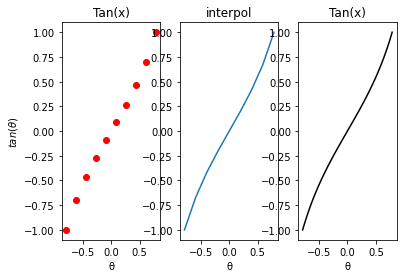

In [ ]:
#plt.plot(x,y,'ro',label= "Tan(x)")
#plt.plot(xvals,yinterp,label= "Interpol")

fig, ax= plt.subplots(1,3)
ax[0].plot(x,y,'ro', label = "Tan(x)")
ax[1].plot(xvals,yinterp, label="Interpol")
ax[2].plot(x_2,y2,'k', label= "$tan(θ)$")
#ax[0].legend()
ax[0].set_title("Tan(x)")
ax[0].set_xlabel("θ")
ax[0].set_ylabel("$tan(θ)$")
ax[1].set_title("interpol")
ax[1].set_xlabel("θ")
ax[2].set_title("Tan(x)")
ax[2].set_xlabel("θ")
#ax[1].legend()

# **Interpolacion con lagrange**
 __Activity__: Apply lagrange interpolations with the following points, work with pandas data frame


x =  np.array([1, 1.3, 1.6, 1.9, 2.2])

fx =  np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])

In [ ]:
dicc = {
        'x':np.array([1, 1.3, 1.6, 1.9, 2.2]),
        "fx":np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])
         }

In [ ]:
df= pd.DataFrame(dicc)
df

,x,fx
0,1.0,0.765198
1,1.3,0.620086
2,1.6,0.455402
3,1.9,0.281819
4,2.2,0.110362


In [ ]:
poly= lagrange(df['x'],df['fx'])

In [ ]:
print(poly)

          4           3         2
0.001825 x + 0.05529 x - 0.343 x + 0.07339 x + 0.9777


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


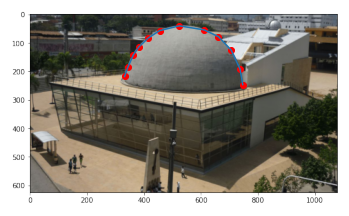

In [ ]:
#%matplotlib widget
#%matplotlib notebook
url= "/content/drive/MyDrive/Colab Notebooks/planetario.png"
imag = plt.imread(url)
plt.imshow(imag)
plt.xticks([])
plt.yticks([])
plt.axis('off')
x = np.array([169.9, 174.8, 182.6, 190.5, 204.2, 220.9, 249.3, 285.5, 306.1, 324.7, 337.5, 341.4])
y = np.array([100.4, 86.7, 69.1, 57.6, 44.6, 33.8, 26.9, 32.8, 42.6, 62.2, 89.6, 112.2])
poly2= lagrange(x,y)
plt.plot(x, y, 'ro')
plt.plot(x,poly2(x))
plt.show()

